### Working with RGB and Hex masks for semantic Segmentation

Reference:

[Python tips and tricks - 8: Working with RGB (and Hex) masks for semantic segmentation](https://www.youtube.com/watch?v=sGAwx4GMe4E)

by Dr. Sreenivas Bhattiprolu

Dataset: [Semantic segmentation of aerial imagery](https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery)

Dataset Mask Images Hex codes

* Building: #3C1098
* Land (unpaved area): #8429F6
* Road: #6EC1E4
* Vegetation: #FEDD3A
* Water: #E2A929
* Unlabeled: #9B9B9B

### RGB to HEX: (Hexadecimal, 16bits)

This number divided by sixteen (integer division) gives the first hexadeciaml digit (0 to F, where the letters A to F represent the numbers 10 to 15). The remainder gives the second hexadecimal digit.

Example RGB image: R=201, G=120, B=19
R=201/16 = 12 with remainder 9. Hex code for R is C9
G=120/16 = 7 with remainder 8. Hex code for G is 78
B=19/16 = 1 with remainder 3. Hex code for B is 13

Code:

    a = int('3C', 16)  # 3C with base 16. Return 60

### HEX to RGB

Example HEX image: `#3C1098`

3C= 3*16 + 12 = 60

10= 1*16 + 0 = 16

90= 9*16 + 8 = 152

Code:

    rgb_img = '#3C1098'.lstrip('#')
    rgb_img = np.array(tuple(rgb_img[i:i+2], 16) for i in (0,2,4))

In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
Building_hex_code = '#3C1098'
Land_hex_code = '#8429F6'
Road_hex_code = '#6EC1E4'
Vegetation_hex_code = '#FEDD3A'
Water_hex_code = '#E2A929'
Unlabeled_hex_code = '#9B9B9B'

In [3]:
! pip install -q kaggle

#from google.colab import files
# files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery

 95% 28.0M/29.6M [00:01<00:00, 19.1MB/s]
100% 29.6M/29.6M [00:01<00:00, 17.4MB/s]


In [4]:
import os

os.makedirs('utils/', exist_ok=True)
os.chdir('utils')

#! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/models.py
#! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/losses.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/vision.py
#! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/callbacks.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/utils.py

os.chdir('/content')
print("Current working directory", os.getcwd())

--2023-11-05 05:57:24--  https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/vision.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12205 (12K) [text/plain]
Saving to: ‘vision.py’

vision.py           100%[===================>]  11.92K  --.-KB/s    in 0s      

2023-11-05 05:57:24 (70.1 MB/s) - ‘vision.py’ saved [12205/12205]

--2023-11-05 05:57:24--  https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18789 (18K) [text/plain]
Savin

In [5]:
#from utils.losses import dice_coef, jacard_coef, jacard_coef_loss, dice_coef_loss
#from utils.models import UNet, Attention_UNet, Attention_ResUNet
from utils import utils
from utils import vision

### Convert mask images with HEX code to RGB codes

In [6]:
Building_rgb_code = utils.hexc_to_rgbc(Building_hex_code)
Land_rgb_code = utils.hexc_to_rgbc(Land_hex_code)
Road_rgb_code = utils.hexc_to_rgbc(Road_hex_code)
Vegetation_rgb_code = utils.hexc_to_rgbc(Vegetation_hex_code)
Water_rgb_code = utils.hexc_to_rgbc(Water_hex_code)
Unlabeled_rgb_code = utils.hexc_to_rgbc(Unlabeled_hex_code)

In [40]:
def create_labels_for_mask(mask, categories):
  '''
  Set label masks as input in RGB format
  Replace pixels with specific RGB values
  categories: rgb_codes for specified categories
  '''
  label_seg = np.zeros(mask.shape, dtype=np.uint8)
  for ix, category in enumerate(categories):
      label_seg[np.all(mask == category, axis=-1)] = ix

  return label_seg[:,:,0]  # Just return the first channel

In [41]:
def rgb_to_2D_label_map(mask_imgs, categories):
    labels = []

    for ix in range(mask_imgs.shape[0]):
      label = create_labels_for_mask(mask_imgs[ix], categories=categories)
      labels.append(label)

    labels = np.array(labels)
    labels = np.expand_dims(labels, axis=3)

    return labels

In [10]:
categories = [Building_rgb_code, Land_rgb_code, Road_rgb_code, Vegetation_rgb_code, Water_rgb_code, Unlabeled_rgb_code]

In [11]:
utils.unzip_data('/content/semantic-segmentation-of-aerial-imagery.zip')

In [12]:
utils.walk_through_dir('/content/Semantic segmentation dataset')

There are 8 directories and 1 images in '/content/Semantic segmentation dataset'.
There are 2 directories and 0 images in '/content/Semantic segmentation dataset/Tile 6'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 6/masks'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 6/images'.
There are 2 directories and 0 images in '/content/Semantic segmentation dataset/Tile 2'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 2/masks'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 2/images'.
There are 2 directories and 0 images in '/content/Semantic segmentation dataset/Tile 4'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 4/masks'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 4/images'.
There are 2 directories and 0 images in '/content/Semantic segmentation datase

In [13]:
img_file_list = utils.get_all_img_files_in_directory('/content/Semantic segmentation dataset', ext='jpg')

In [14]:
img_file_list[:5]

['/content/Semantic segmentation dataset/Tile 6/images/image_part_008.jpg',
 '/content/Semantic segmentation dataset/Tile 6/images/image_part_006.jpg',
 '/content/Semantic segmentation dataset/Tile 6/images/image_part_009.jpg',
 '/content/Semantic segmentation dataset/Tile 6/images/image_part_004.jpg',
 '/content/Semantic segmentation dataset/Tile 6/images/image_part_007.jpg']

In [15]:
mask_file_list = utils.get_all_img_files_in_directory('/content/Semantic segmentation dataset', ext='png')

In [16]:
print("Lengthe of img_file_list: ",len(img_file_list))
print("Lengthe of mask_file_list: ",len(mask_file_list))

Lengthe of img_file_list:  72
Lengthe of mask_file_list:  72


In [17]:
sample_img_1 = utils.load_images(img_file_list[0], img_size=None, scl=False, num_channels=3)
sample_img_2 = utils.load_images(img_file_list[14], img_size=None, scl=False, num_channels=3)

print("sample_img_1.shape: ", sample_img_1.shape)
print("sample_img_2.shape: ", sample_img_2.shape)

sample_img_1.shape:  (838, 859, 3)
sample_img_2.shape:  (544, 509, 3)


Images in dataset are in different sizes. One of the approaches to train model with dataset containing images of different sizes is patchifying them into specified sizes.


Tile 1: 797 x 644 --> 768 x 512 --> 6

Tile 2: 509 x 544 --> 512 x 256 --> 2

Tile 3: 682 x 658 --> 512 x 512  --> 4

Tile 4: 1099 x 846 --> 1024 x 768 --> 12

Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16

Tile 6: 859 x 838 --> 768 x 768 --> 9

Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56

Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40

Total 9 images in each folder * (145 patches) = 1305

Total 1305 patches of size 256x256

In [18]:
# https://pypi.org/project/patchify/
#! pip install patchify

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from PIL import Image
import cv2

PATCH_SIZE = 256

def patchify_images(img_file_list, patch_size=256, method='CROP', scl=False, cvt_rgb=False, verbose=0):
    '''
    img_file_list: Takes image files' paths as input
    patch_size: Divides all images to speicifed patch size
    method: Partitioning method -> 'CROP' or 'RESIZE'
    scl: Scales images
    cvt_rgb: Convert BGR decoding to RGB format
    Return: Image numpy array

    Need patchify package (https://pypi.org/project/patchify/)
    ! pip install patchify
    Modified code of Dr. Sreenivas Bhattiprolu
    '''
    ! pip install patchify
    from patchify import patchify

    image_dataset = []
    scaler = MinMaxScaler(feature_range=(0,1))

    for image_file in img_file_list:
      image = cv2.imread(image_file, 1)  # Read each image as BGR
      if cvt_rgb == True:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      SIZE_X = (image.shape[1]//PATCH_SIZE)*PATCH_SIZE # Nearest size divisible by specified patch size
      SIZE_Y = (image.shape[0]//PATCH_SIZE)*PATCH_SIZE # Nearest size divisible by specified patch size
      image = Image.fromarray(image)
      if method == 'RESIZE':
        image = image.resize((SIZE_X, SIZE_Y))  # Not recommended for semantic segmentation
      else:
        image = image.crop((0 ,0, SIZE_X, SIZE_Y))  # Crop from top left corner
      image = np.array(image)
      patches_img = patchify(image, (PATCH_SIZE, PATCH_SIZE, 3), step=PATCH_SIZE)  # Step = PATCH_SIZE for PATCH_SIZE patches means no overlap

      for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]

            if scl ==True:
              # Use minmaxscaler instead of just dividing by 255.
              single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
              # single_patch_img = (single_patch_img.astype('float32')) / 255.

            single_patch_img = single_patch_img[0] # No need to other dimensions.
            image_dataset.append(single_patch_img)

    return np.array(image_dataset)

In [20]:
img_list = patchify_images(img_file_list, patch_size=PATCH_SIZE, scl=True)

In [21]:
mask_list = patchify_images(mask_file_list, patch_size=PATCH_SIZE, scl=False, cvt_rgb=True)

In [22]:
print("img_list.shape: ", img_list.shape)
print("mask_list.shape: ", mask_list.shape)

img_list.shape:  (1305, 256, 256, 3)
mask_list.shape:  (1305, 256, 256, 3)


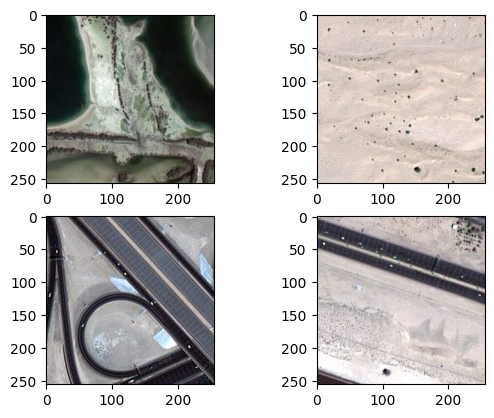

In [23]:
plt.subplot(2,2,1)
plt.imshow(img_list[4])
plt.subplot(2,2,2)
plt.imshow(img_list[245])
plt.subplot(2,2,3)
plt.imshow(img_list[512])
plt.subplot(2,2,4)
plt.imshow(img_list[1002])
plt.show()

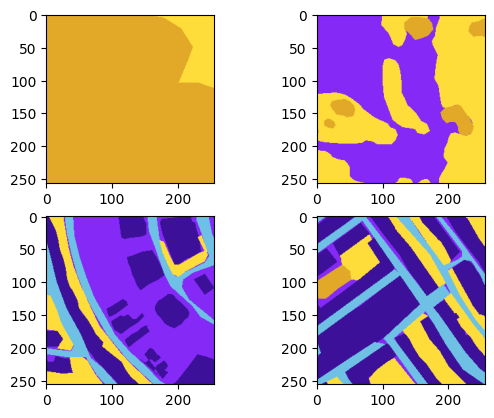

In [24]:
plt.subplot(2,2,1)
plt.imshow(mask_list[4])
plt.subplot(2,2,2)
plt.imshow(mask_list[245])
plt.subplot(2,2,3)
plt.imshow(mask_list[512])
plt.subplot(2,2,4)
plt.imshow(mask_list[1002])
plt.show()

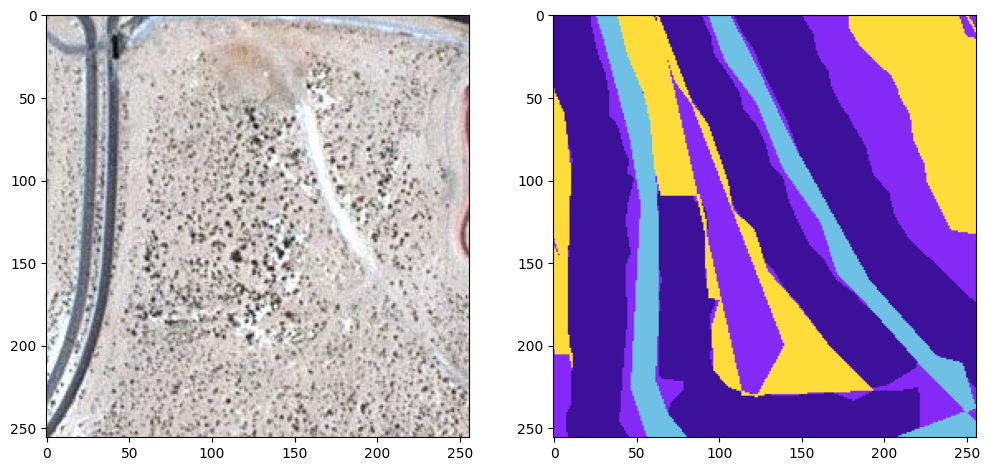

In [ ]:
import random

num = random.randint(0, len(img_list))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(img_list[num], (PATCH_SIZE, PATCH_SIZE, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_list[num], (PATCH_SIZE, PATCH_SIZE, 3)))
plt.show()

In [42]:
label_list = rgb_to_2D_label_map(mask_imgs=mask_list, categories=categories)

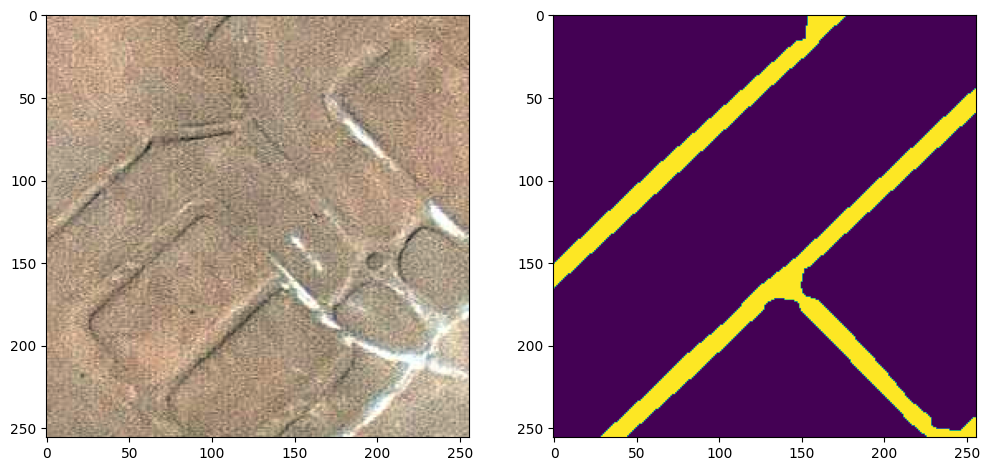

In [46]:
import random

image_number = random.randint(0, len(img_list))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_list[image_number])
plt.subplot(122)
plt.imshow(label_list[image_number][:,:,0])
plt.show()

In [48]:
print("Unique labels in label dataset are: ", np.unique(label_list))

Unique labels in label dataset are:  [0 1 2 3 4 5]


Convert all labels to the categorical type data

In [49]:
from keras.utils import to_categorical

labels_cat = to_categorical(label_list, num_classes=len(np.unique(label_list)))

### Reference

https://github.com/bnsreenu/python_for_microscopists/blob/master/228_semantic_segmentation_of_aerial_imagery_using_unet/228_training_aerial_imagery.py#L35

https://www.youtube.com/watch?v=jvZm8REF2KY

https://www.youtube.com/watch?v=sGAwx4GMe4E